# ASL Data Augmentation
We're going to programmatically increase the size and variance in our dataset. This is known as `Data Augmentation`, a useful technique for many deep learning applications.

# Preparing the Data

In [1]:
from tensorflow import keras
import scipy
import pandas as pd
train_df = pd.read_csv('data/asl_data/sign_mnist_train.csv')
valid_df = pd.read_csv('data/asl_data/sign_mnist_valid.csv')

y_train = train_df['label']
y_valid = valid_df['label']

del train_df['label']
del valid_df['label']

x_train = train_df.values
x_valid = valid_df.values

x_train = x_train/255
x_valid = x_valid/255

x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)


# Creating Model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       2

# Data Augmentation

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range =10, # Rotates image in the range(0 to 180,degrees)
    zoom_range =0.1, #  Randomly zooms image
    width_shift_range =0.1, # Randomly shifts image horizontally
    height_shift_range =0.1, # Randomly shifts image vertically
    horizontal_flip =True, # Randomly flips image horizontally
    vertical_flip =False # Randomly flips image vertically but set to False
)

Vertical_flip is set to False since, it's unlikely that those images are going to be upside-down.

# Batch Size
If model is truly random, meaning that the data is properly shuffled, so it's fair like a deck of cards, then our sample can do a good job of representing all of our data even though it is a tiny fraction of the population. For each step of the training, the model will be dealt new batch.

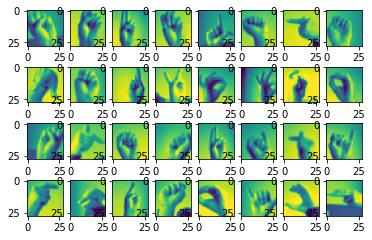

In [12]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

# Fitting the Data into Generator

In [5]:
datagen.fit(x_train)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Training the Model

In [6]:
model.fit(
    img_iter,
    epochs= 10,
    steps_per_epoch=len(x_train)/batch_size,
    validation_data=(x_valid,y_valid)
)

Epoch 1/10
857/857 [==============================] - 84s 93ms/step - loss: 1.0869 - accuracy: 0.6484 - val_loss: 0.5479 - val_accuracy: 0.7835
Epoch 2/10
857/857 [==============================] - 79s 92ms/step - loss: 0.3114 - accuracy: 0.8942 - val_loss: 0.3038 - val_accuracy: 0.8928
Epoch 3/10
857/857 [==============================] - 76s 89ms/step - loss: 0.1925 - accuracy: 0.9355 - val_loss: 0.9304 - val_accuracy: 0.7757
Epoch 4/10
496/857 [================>.............] - ETA: 32s - loss: 0.1532 - accuracy: 0.9505

KeyboardInterrupt: 

# Saving the Model

In [ ]:
model.save('asl_model')

# Summary